In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
## Data Cleaning

In [2]:
df = pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [3]:
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [4]:
df.shape

(9994, 11)

In [5]:
df.isna().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [8]:
df.duplicated().sum()

np.int64(0)

# EDA & Visualization

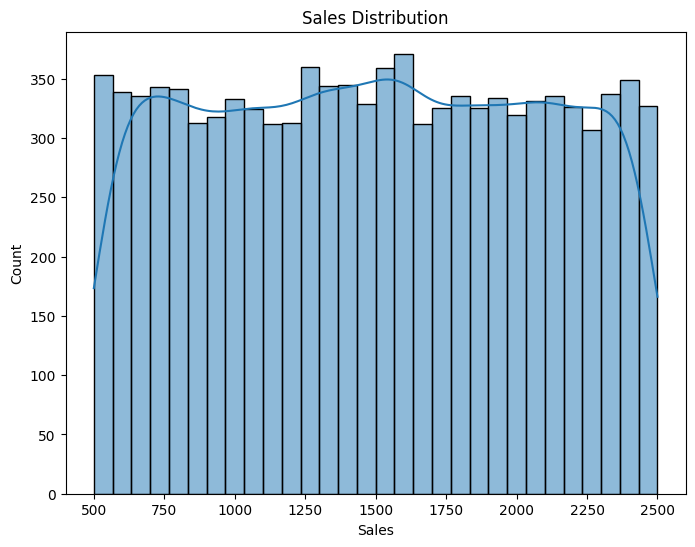

In [9]:
# Sales distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

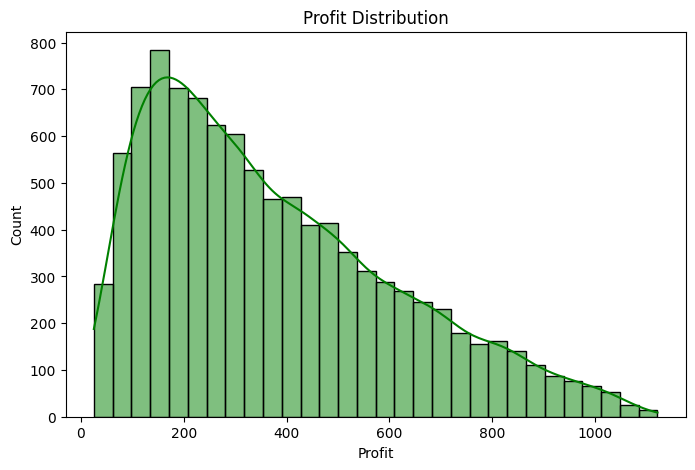

In [10]:
# Profit distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=30, kde=True, color='green')
plt.title("Profit Distribution")
plt.show()

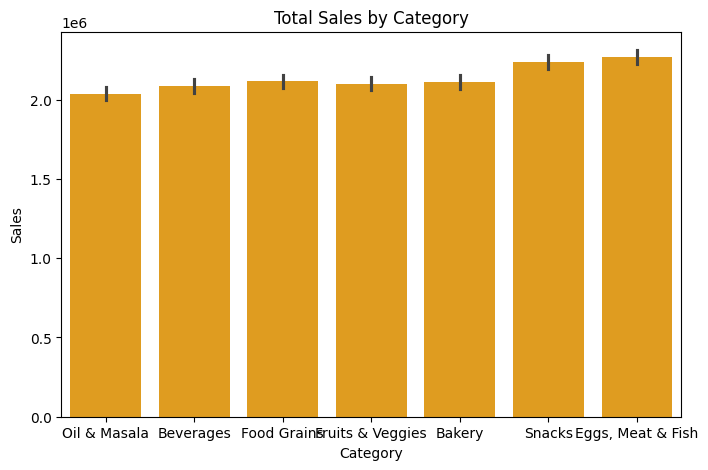

In [11]:
# Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Sales", data=df,color='orange',estimator=sum)
plt.title("Total Sales by Category")
plt.show()

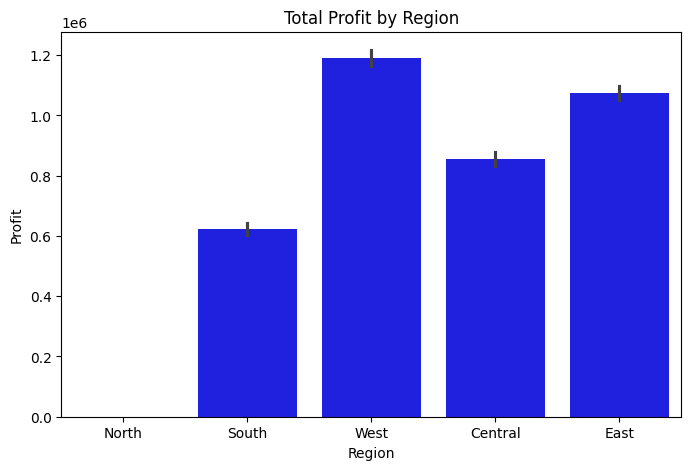

In [12]:
# Profit by Region
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Profit", data=df, estimator=sum, color='blue')
plt.title("Total Profit by Region")
plt.show()

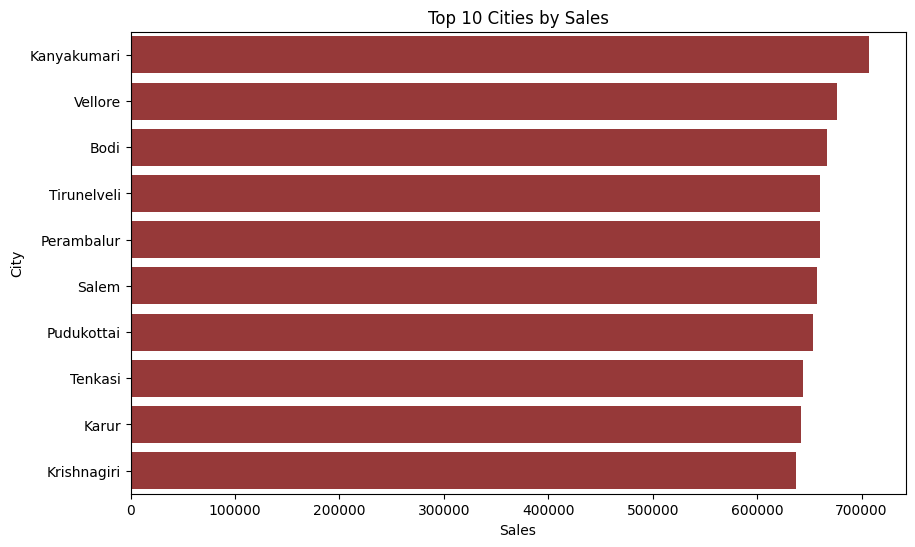

In [13]:
# Top 10 Cities by Sales
top_cities = df.groupby("City")["Sales"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Sales", y="City", data=top_cities, color='brown')
plt.title("Top 10 Cities by Sales")
plt.show()

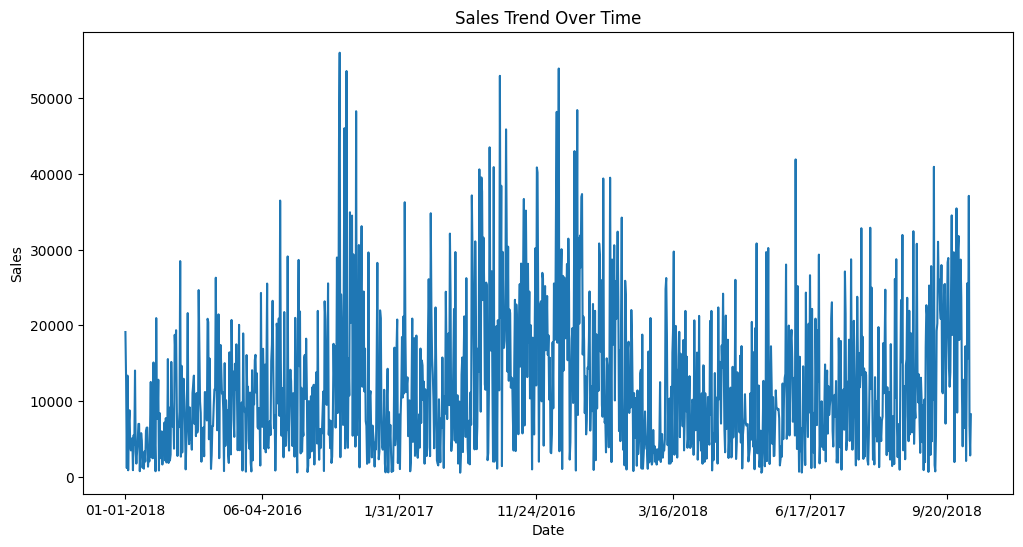

In [14]:
# Sales trend over time
plt.figure(figsize=(12,6))
df.groupby("Order Date")["Sales"].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Advanced EDA Plots

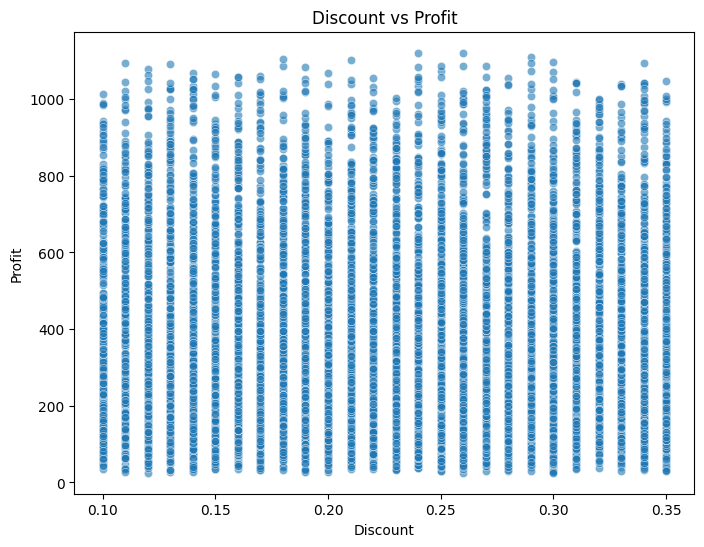

In [15]:
# Discount vs Profit (scatter plot)
plt.figure(figsize=(8,6))
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.6)
plt.title("Discount vs Profit")
plt.show()

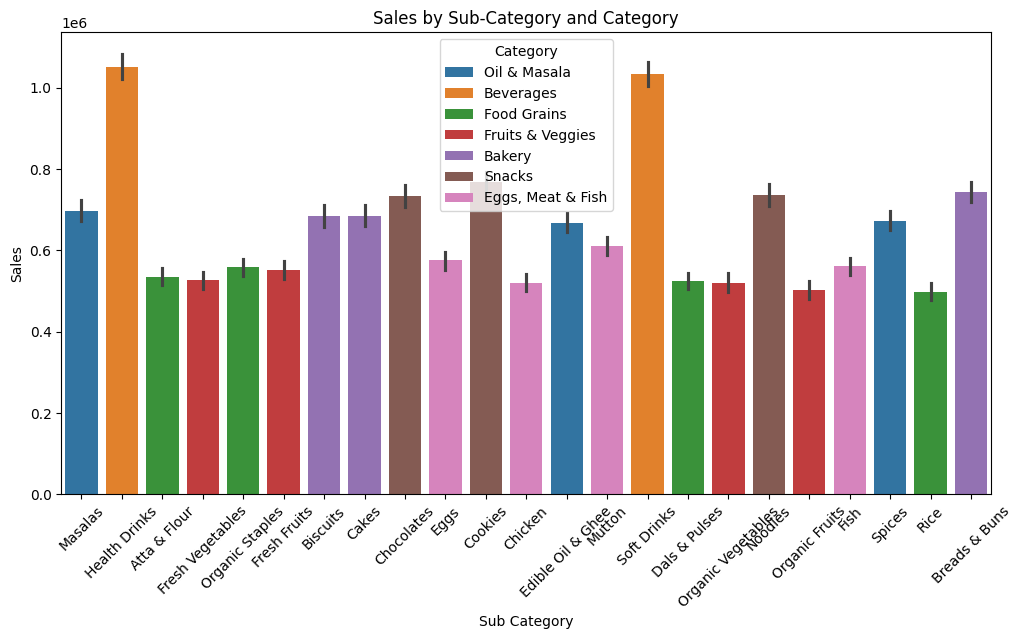

In [16]:
# Category & Sub-Category wise Sales
plt.figure(figsize=(12,6))
sns.barplot(x="Sub Category", y="Sales", hue="Category", data=df, estimator=sum)
plt.title("Sales by Sub-Category and Category")
plt.xticks(rotation=45)
plt.show()

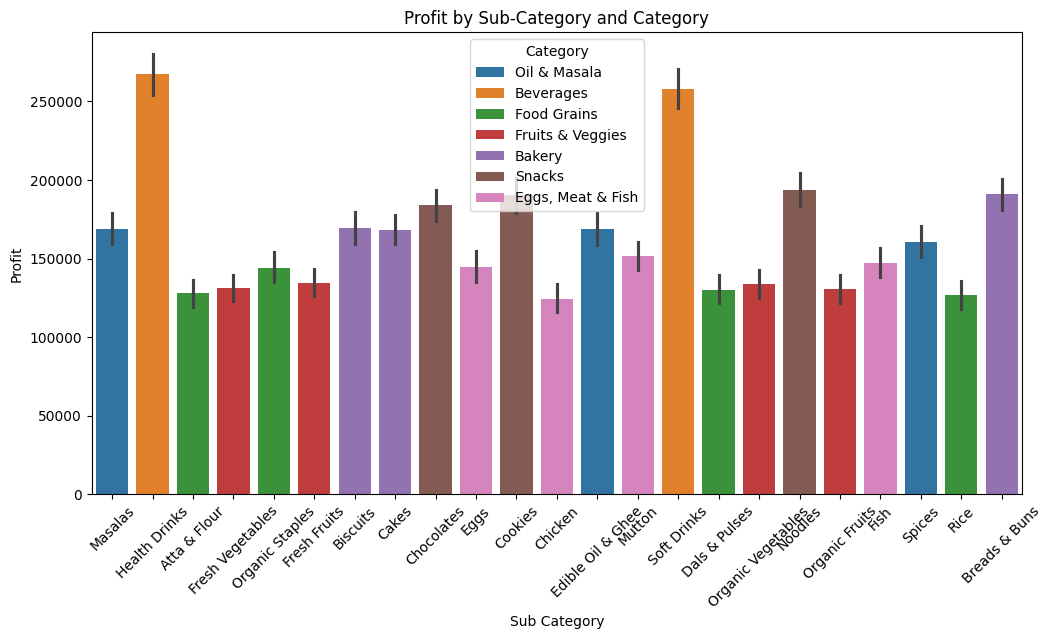

In [17]:
# Category & Sub-Category wise Profit
plt.figure(figsize=(12,6))
sns.barplot(x="Sub Category", y="Profit", hue="Category", data=df, estimator=sum)
plt.title("Profit by Sub-Category and Category")
plt.xticks(rotation=45)
plt.show()

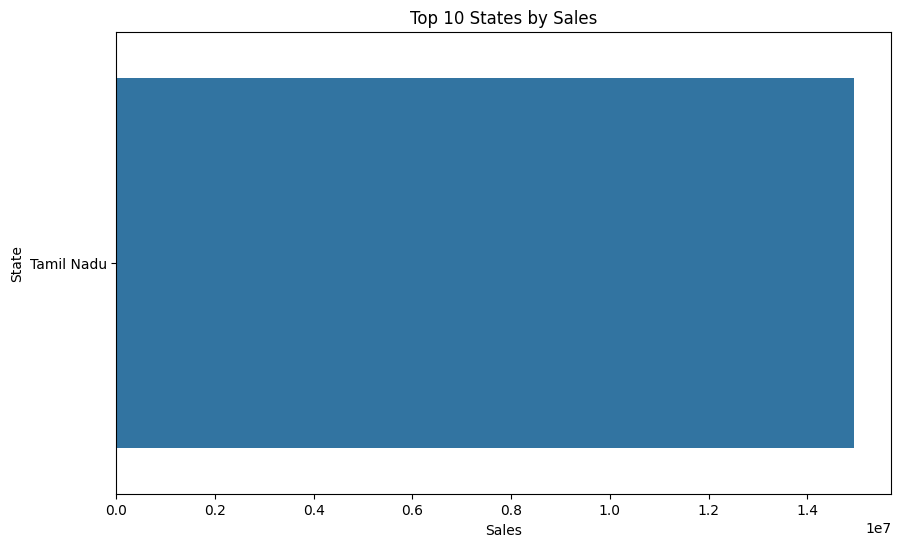

In [18]:
# State wise Sales (Top 10 states)
top_states = df.groupby("State")["Sales"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Sales", y="State", data=top_states)
plt.title("Top 10 States by Sales")
plt.show()

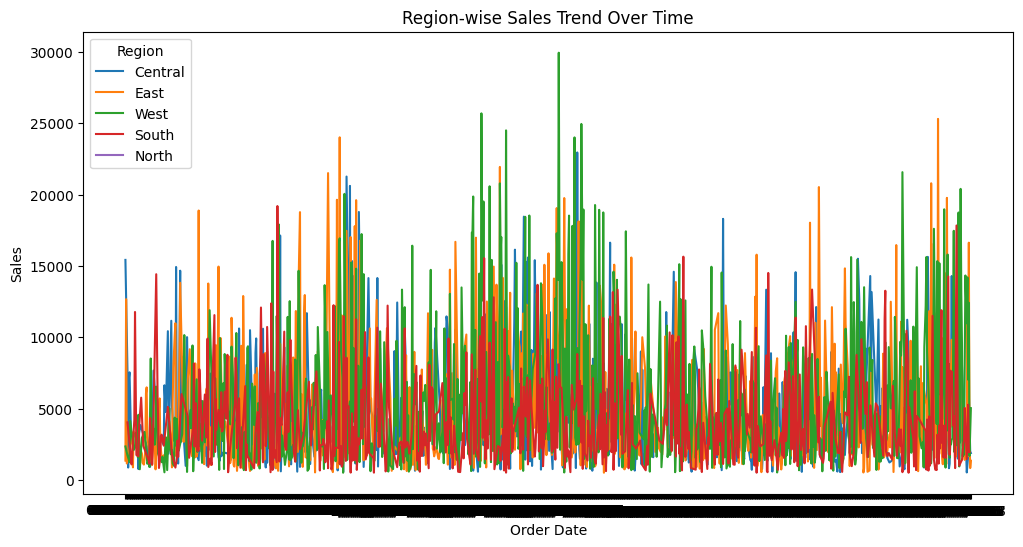

In [19]:
# Region wise Sales Trend (time series)
plt.figure(figsize=(12,6))
region_trend = df.groupby(["Order Date","Region"])["Sales"].sum().reset_index()
sns.lineplot(x="Order Date", y="Sales", hue="Region", data=region_trend)
plt.title("Region-wise Sales Trend Over Time")
plt.show()

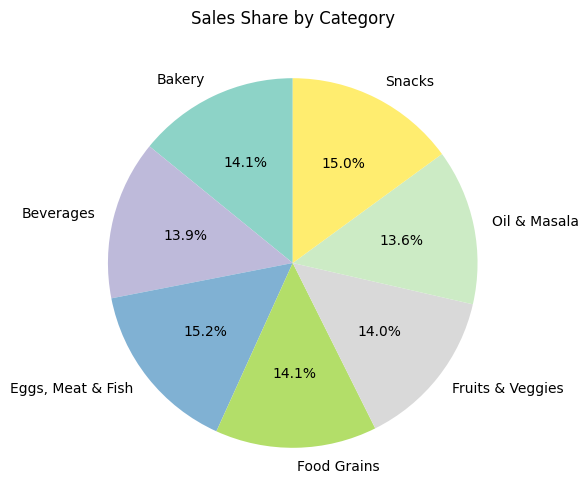

In [20]:
# Sales share by Category
category_sales = df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(6,6))
category_sales.plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Sales Share by Category")
plt.ylabel("")
plt.show()

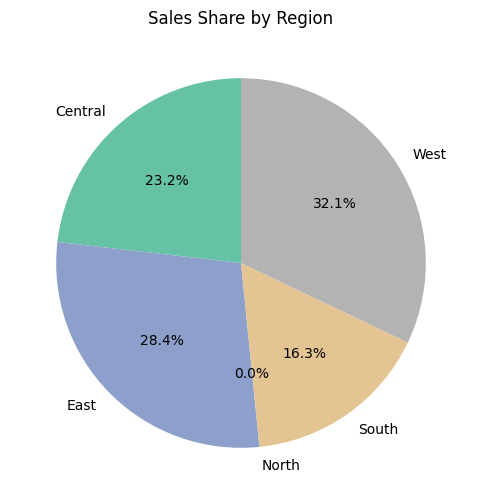

In [21]:
# Sales share by Region
region_sales = df.groupby("Region")["Sales"].sum()
plt.figure(figsize=(6,6))
region_sales.plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set2")
plt.title("Sales Share by Region")
plt.ylabel("")
plt.show()

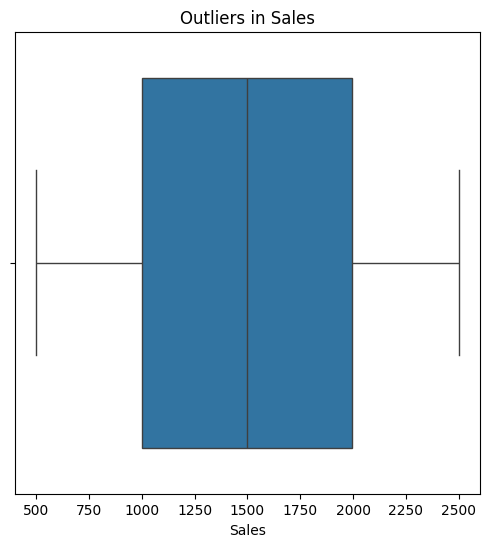

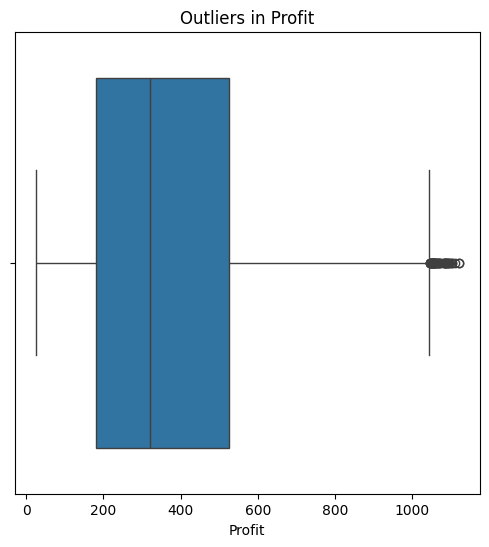

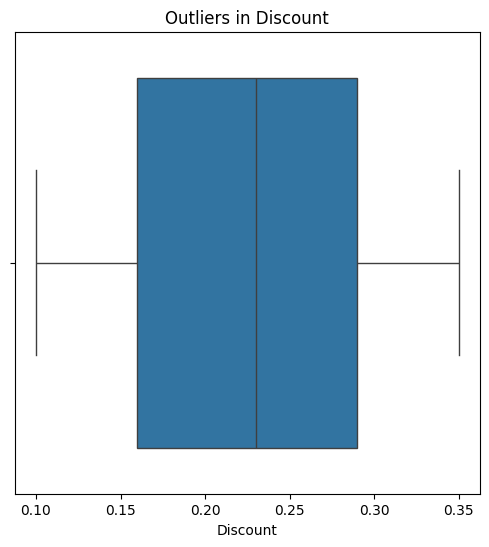

In [22]:
# Outliers Detection
num_cols = ["Sales", "Profit", "Discount"]

for col in num_cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

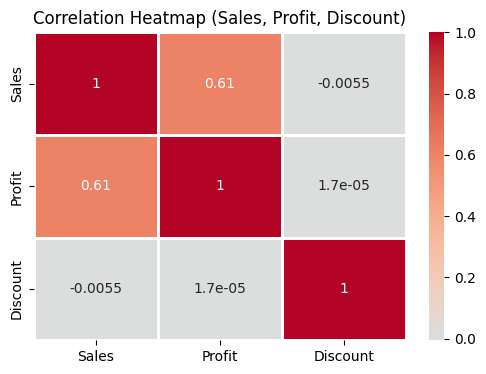

In [23]:
# Correlation matrix
plt.figure(figsize=(6,4))
corr = df[["Sales", "Profit", "Discount"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=1)
plt.title("Correlation Heatmap (Sales, Profit, Discount)")
plt.show()

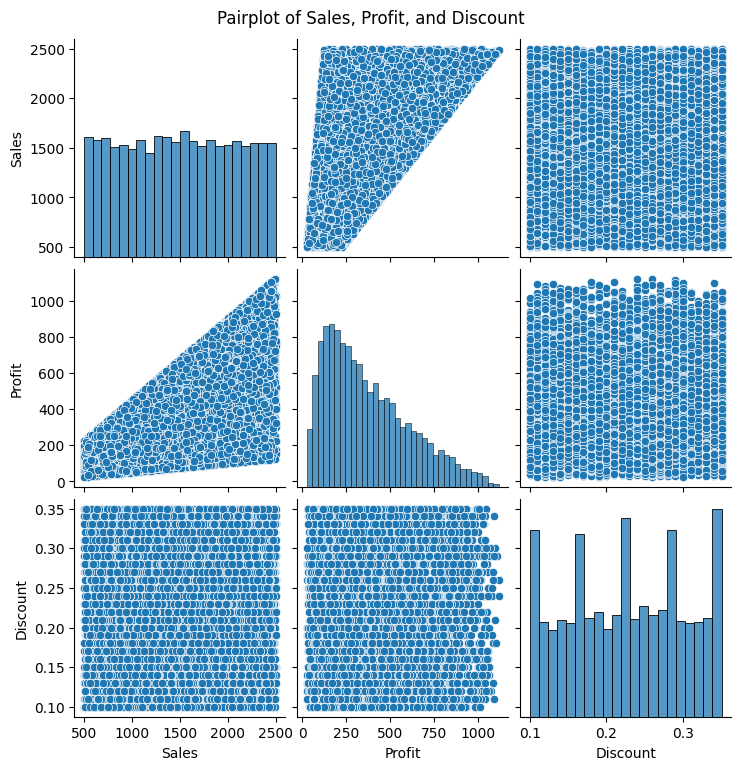

In [24]:
sns.pairplot(df[["Sales", "Profit", "Discount"]])
plt.suptitle("Pairplot of Sales, Profit, and Discount", y=1.02)
plt.show()

# Advance preprocessing

In [25]:
# Converting Order Date to datetime features
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

In [26]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month,Day,DayOfWeek,IsWeekend
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017.0,11.0,8.0,2.0,0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017.0,11.0,8.0,2.0,0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017.0,6.0,12.0,0.0,0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016.0,10.0,11.0,1.0,0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016.0,10.0,11.0,1.0,0


In [27]:
# Converting categorical to numerical
df = pd.get_dummies(df, columns=['Category', 'Sub Category', 'Region', 'State'])

In [28]:
df.tail()

,Order ID,Customer Name,City,Order Date,Sales,Discount,Profit,Year,Month,Day,...,Sub Category_Organic Vegetables,Sub Category_Rice,Sub Category_Soft Drinks,Sub Category_Spices,Region_Central,Region_East,Region_North,Region_South,Region_West,State_Tamil Nadu
9989,OD9990,Sudeep,Madurai,NaT,945,0.16,359.10,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,True
9990,OD9991,Alan,Kanyakumari,2015-07-12,1195,0.26,71.70,2015.0,7.0,12.0,...,False,False,False,False,False,False,False,False,True,True
9991,OD9992,Ravi,Bodi,2017-06-06,1567,0.16,501.44,2017.0,6.0,6.0,...,False,True,False,False,False,False,False,False,True,True
9992,OD9993,Peer,Pudukottai,NaT,1659,0.15,597.24,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,True,True
9993,OD9994,Ganesh,Tirunelveli,NaT,1034,0.28,165.44,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,True


In [29]:
# Outlier handling (IQR capping) - backup originals
num_cols = ['Sales','Profit','Discount']
for c in num_cols:
    if c in df.columns:
        df[c + '_orig'] = df[c].copy()
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[c] = df[c].clip(lower=lower, upper=upper)

In [30]:
# Feature engineering

if 'Quantity' in df.columns and 'Sales' in df.columns:
    df['UnitPrice'] = df['Sales'] / df['Quantity']

# Profit margin (safe division)
if 'Profit' in df.columns and 'Sales' in df.columns:
    df['ProfitMargin'] = df['Profit'] / df['Sales']
    df['ProfitMargin'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['ProfitMargin'].fillna(0, inplace=True)

# Optional: log transform target
df['LogSales'] = np.log1p(df['Sales'])

In [31]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['float64','int64']).columns.drop(['Sales'], errors='ignore')

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [32]:
drop_cols = [
    'Order ID','City','Sales','Order Date','LogSales','ProfitMargin',
    'Sales_orig','Profit_orig','Discount_orig','Customer Name'
]
X = df.drop(columns=drop_cols, errors='ignore')
y = df['Sales']
X = pd.get_dummies(X, drop_first=True).fillna(0)

In [33]:
print(X.columns.tolist())

['Discount', 'Profit', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Category_Bakery', 'Category_Beverages', 'Category_Eggs, Meat & Fish', 'Category_Food Grains', 'Category_Fruits & Veggies', 'Category_Oil & Masala', 'Category_Snacks', 'Sub Category_Atta & Flour', 'Sub Category_Biscuits', 'Sub Category_Breads & Buns', 'Sub Category_Cakes', 'Sub Category_Chicken', 'Sub Category_Chocolates', 'Sub Category_Cookies', 'Sub Category_Dals & Pulses', 'Sub Category_Edible Oil & Ghee', 'Sub Category_Eggs', 'Sub Category_Fish', 'Sub Category_Fresh Fruits', 'Sub Category_Fresh Vegetables', 'Sub Category_Health Drinks', 'Sub Category_Masalas', 'Sub Category_Mutton', 'Sub Category_Noodles', 'Sub Category_Organic Fruits', 'Sub Category_Organic Staples', 'Sub Category_Organic Vegetables', 'Sub Category_Rice', 'Sub Category_Soft Drinks', 'Sub Category_Spices', 'Region_Central', 'Region_East', 'Region_North', 'Region_South', 'Region_West', 'State_Tamil Nadu']


In [34]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Evaluation (LR,RF,GB)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Model define
lr = LinearRegression()

# Train (fit on train data)
lr.fit(X_train, y_train)

# Predict (on test data)
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Linear Regression Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("R2  :", r2_score(y_test, y_pred_lr))

Linear Regression Results
RMSE: 462.4355555911851
MAE : 380.6574116315615
R2  : 0.35161954012912844


In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results.append({
        "Model": name,
        "RMSE": np.sqrt(mean_squared_error(y_test, pred)),
        "MAE": mean_absolute_error(y_test, pred),
        "R2": r2_score(y_test, pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model        RMSE         MAE        R2
0  Linear Regression  462.435556  380.657412  0.351620
1      Random Forest  479.693926  388.039104  0.302321
2  Gradient Boosting  460.595945  378.732996  0.356768


# Hyperparameter Tuning (RandomizedSearchCV)

In [37]:
# Parameter distributions (recommended ranges)
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.2, 0.5],
    'bootstrap': [True, False]
}

In [38]:
# RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 30],
                                        'max_features': ['sqrt', 'log2', 0.2,
                                                         0.5],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [39]:
print("BEST PARAMS:", search.best_params_)
# CV score is negative MSE (sklearn), convert to RMSE:
best_cv_rmse = np.sqrt(-search.best_score_)
print("Best CV RMSE (average on folds):", best_cv_rmse)

BEST PARAMS: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 10, 'bootstrap': True}
Best CV RMSE (average on folds): 457.8343607408568


In [40]:
# Evaluate best estimator on test set
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)

print("TUNED RF  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("TUNED RF  MAE :", mean_absolute_error(y_test, y_pred))
print("TUNED RF  R2  :", r2_score(y_test, y_pred))

TUNED RF  RMSE: 459.6814774036019
TUNED RF  MAE : 377.7339311643668
TUNED RF  R2  : 0.3593195235622756


Profit                         0.865810
Discount                       0.030965
Day                            0.014246
Month                          0.014121
DayOfWeek                      0.010051
Year                           0.008282
Region_West                    0.004081
Region_East                    0.003982
Region_Central                 0.003773
Region_South                   0.002868
Sub Category_Organic Fruits    0.002338
Category_Food Grains           0.002175
Sub Category_Mutton            0.002105
Category_Beverages             0.002002
Category_Eggs, Meat & Fish     0.001938
dtype: float64


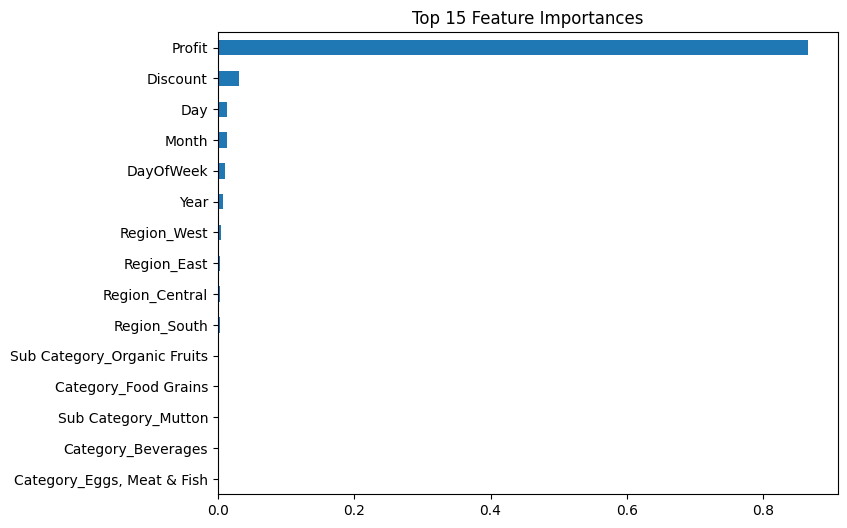

In [41]:
# Top feature importances
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top15 = importances.head(15)
print(top15)
top15[::-1].plot(kind='barh', figsize=(8,6), title='Top 15 Feature Importances'); plt.show()

In [42]:
# Save model for deployment
import joblib
joblib.dump(best_rf, 'best_rf_sales.joblib')
print("Saved -> best_rf_sales.joblib")

Saved -> best_rf_sales.joblib


In [43]:
param_dist_gb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

In [44]:
gb = GradientBoostingRegressor(random_state=42)

search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist_gb,
    n_iter=30,                      # tuning iterations
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_gb.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [45]:
print("BEST PARAMS (GB):", search_gb.best_params_)
best_cv_rmse = np.sqrt(-search_gb.best_score_)
print("Best CV RMSE:", best_cv_rmse)

BEST PARAMS (GB): {'subsample': 0.6, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.1}
Best CV RMSE: 458.0215163797559


In [46]:
best_gb = search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

print("TUNED GB  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("TUNED GB  MAE :", mean_absolute_error(y_test, y_pred_gb))
print("TUNED GB  R2  :", r2_score(y_test, y_pred_gb))

TUNED GB  RMSE: 462.16441849434415
TUNED GB  MAE : 379.64685478288015
TUNED GB  R2  : 0.352379639371189


Profit                         0.908407
Discount                       0.021004
Month                          0.012907
Day                            0.008500
DayOfWeek                      0.006495
Year                           0.004865
Category_Food Grains           0.003318
Sub Category_Organic Fruits    0.002879
Sub Category_Mutton            0.001954
Sub Category_Breads & Buns     0.001907
Sub Category_Health Drinks     0.001904
Sub Category_Soft Drinks       0.001724
Sub Category_Atta & Flour      0.001643
Sub Category_Spices            0.001633
Region_West                    0.001628
dtype: float64


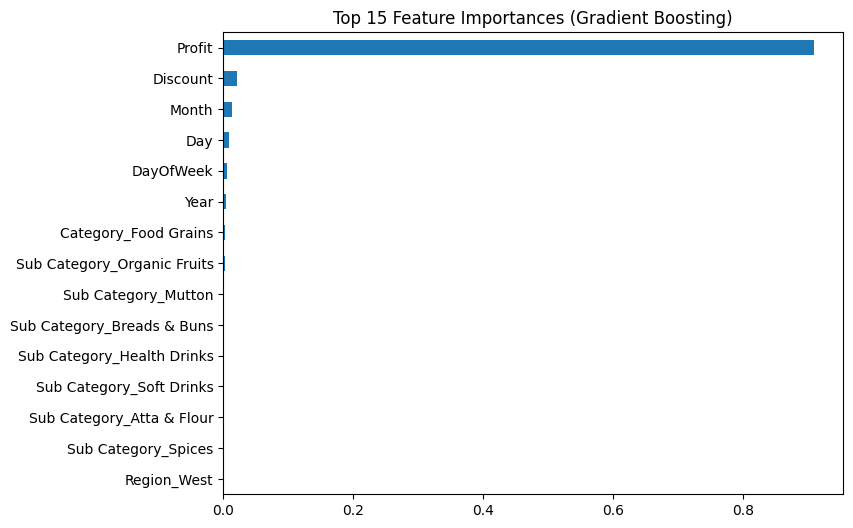

In [47]:
importances = pd.Series(best_gb.feature_importances_, index=X.columns).sort_values(ascending=False)
top15 = importances.head(15)
print(top15)

top15[::-1].plot(kind='barh', figsize=(8,6), title='Top 15 Feature Importances (Gradient Boosting)')
plt.show()

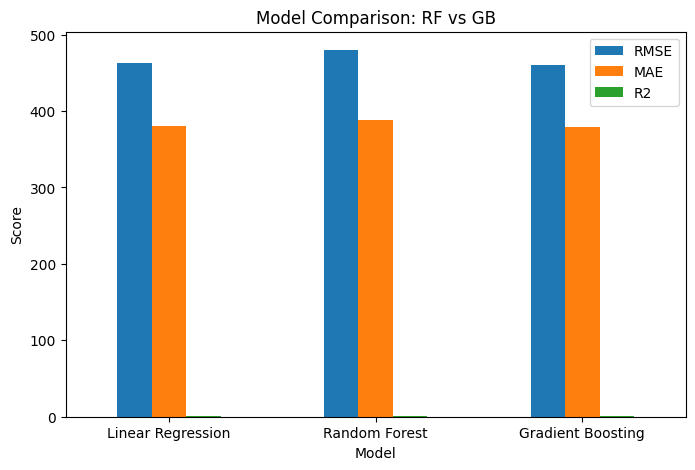

In [48]:
results_df.set_index("Model")[["RMSE","MAE","R2"]].plot(
    kind="bar", figsize=(8,5), title="Model Comparison: RF vs GB", rot=0
)
plt.ylabel("Score")
plt.show()

# Time Series Forecasting

Order Date
2015-01-03      864
2015-01-04     3490
2015-01-05      878
2015-01-06    14026
2015-01-07     3216
Name: Sales, dtype: int64


<Axes: title={'center': 'Daily Sales Trend'}, xlabel='Order Date'>

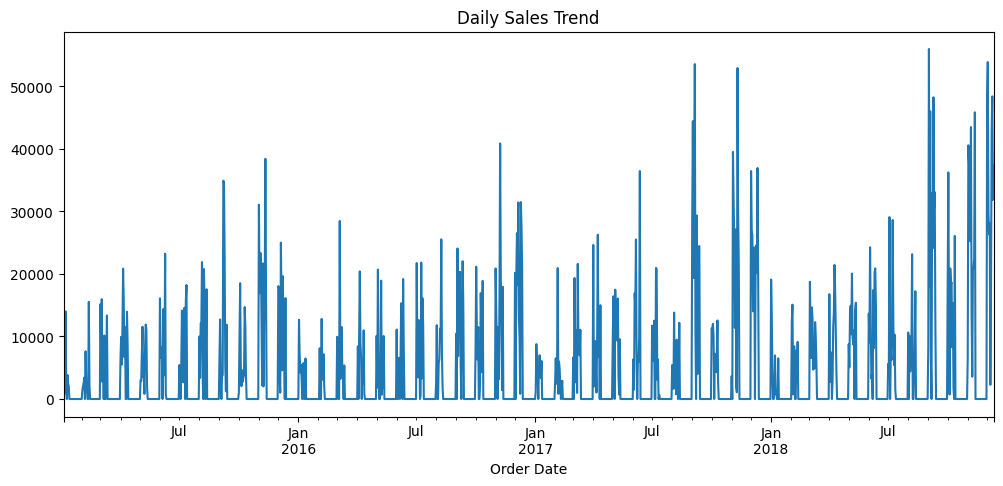

In [49]:
# Step 1: Prepare daily sales time series
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
ts = df.set_index('Order Date').resample('D')['Sales'].sum().fillna(0)

print(ts.head())
ts.plot(figsize=(12,5), title="Daily Sales Trend")

In [50]:
# Split time series: last 30 days = test
test_days = 30
train = ts[:-test_days]
test = ts[-test_days:]

print("Train size:", len(train))
print("Test size :", len(test))

Train size: 1409
Test size : 30


In [51]:
# Naive forecast (last value carry forward)
naive_pred = pd.Series(train.iloc[-1], index=test.index)

# 7-day Moving Average forecast
ma7_pred = pd.Series(train.rolling(7).mean().iloc[-1], index=test.index)

In [52]:
def rmse(a,b): return np.sqrt(mean_squared_error(a,b))
def mape(actual, pred):
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - pred[mask]) / actual[mask])) * 100

print("Naive  → RMSE:", rmse(test, naive_pred), " MAPE:", mape(test, naive_pred))
print("MA(7)  → RMSE:", rmse(test, ma7_pred), " MAPE:", mape(test, ma7_pred))

Naive  → RMSE: 20991.514900073314  MAPE: 108.7710127881472
MA(7)  → RMSE: 20574.754090825954  MAPE: 106.7844184952775


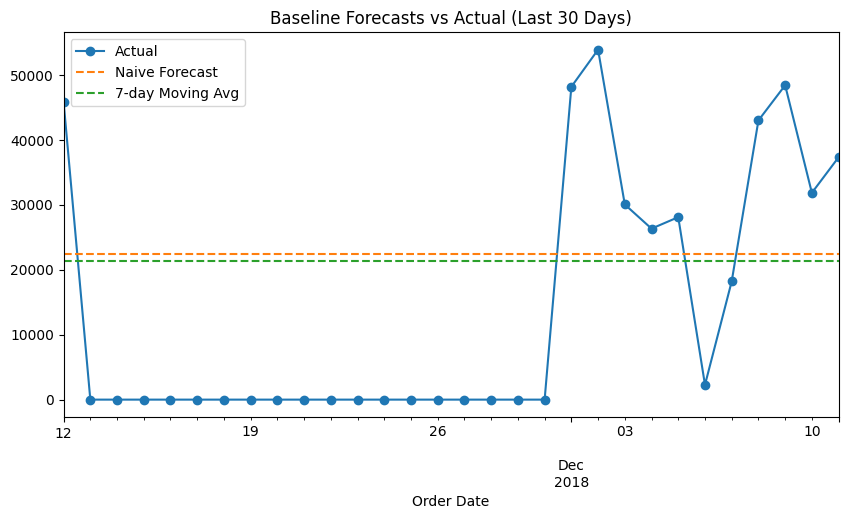

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
test.plot(label="Actual", marker='o')
naive_pred.plot(label="Naive Forecast", linestyle="--")
ma7_pred.plot(label="7-day Moving Avg", linestyle="--")
plt.title("Baseline Forecasts vs Actual (Last 30 Days)")
plt.legend()
plt.show()

In [54]:
# Prophet Forecasting
from prophet import Prophet

prophet_df = ts.reset_index()
prophet_df.columns = ['ds','y']

model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=True)
model.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5uabnnb/hviadcef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5uabnnb/vjbbvbfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46630', 'data', 'file=/tmp/tmpl5uabnnb/hviadcef.json', 'init=/tmp/tmpl5uabnnb/vjbbvbfs.json', 'output', 'file=/tmp/tmpl5uabnnb/prophet_model57ioqmjj/prophet_model-20250910050142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:01:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:01:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


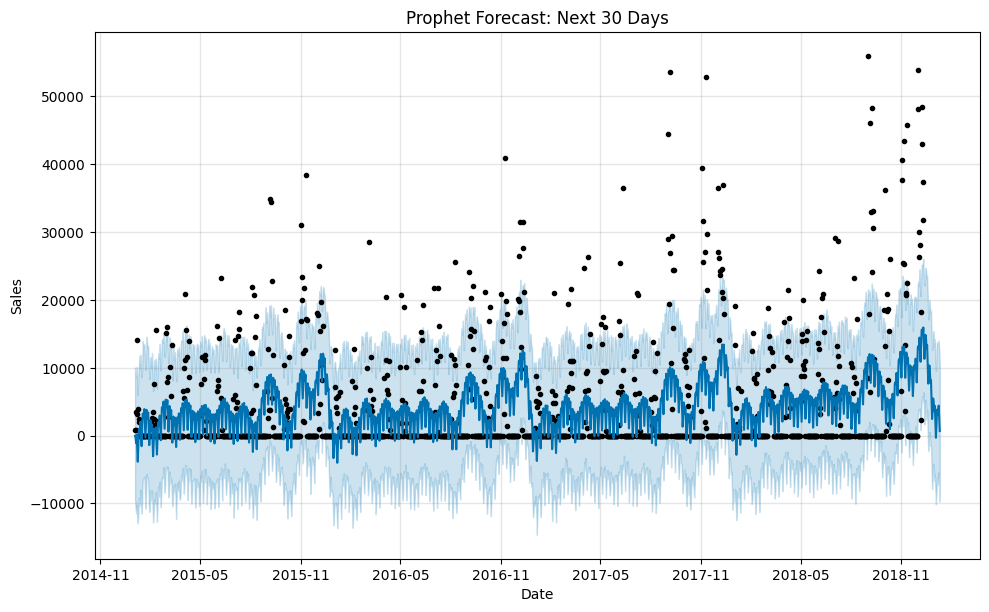

In [55]:
# Future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast, xlabel="Date", ylabel="Sales")
plt.title("Prophet Forecast: Next 30 Days")
plt.show()

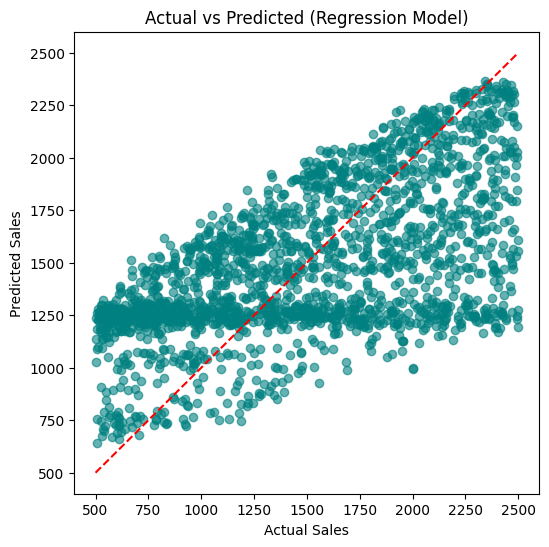

In [56]:
# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
mn = min(min(y_test), min(y_pred))
mx = max(max(y_test), max(y_pred))
plt.plot([mn,mx],[mn,mx], linestyle='--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted (Regression Model)")
plt.show()

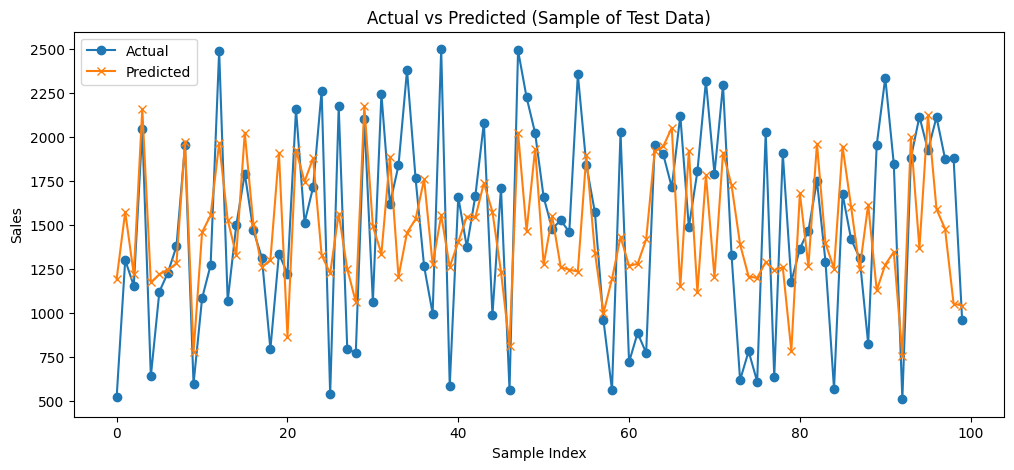

In [57]:
# Line Plot (first 100 samples for clarity)
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label="Actual", marker='o')
plt.plot(y_pred[:100], label="Predicted", marker='x')
plt.title("Actual vs Predicted (Sample of Test Data)")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.show()

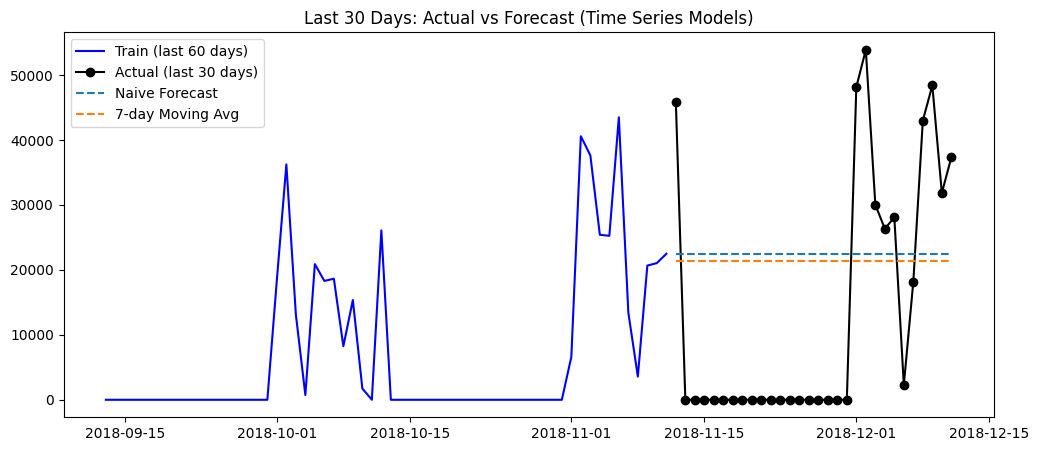

In [58]:
# Time Series last 30 days (Actual vs Forecast)
plt.figure(figsize=(12,5))
plt.plot(train.index[-60:], train[-60:], label="Train (last 60 days)", color="blue")
plt.plot(test.index, test, label="Actual (last 30 days)", marker='o', color="black")
plt.plot(test.index, naive_pred, label="Naive Forecast", linestyle="--")
plt.plot(test.index, ma7_pred, label="7-day Moving Avg", linestyle="--")
plt.title("Last 30 Days: Actual vs Forecast (Time Series Models)")
plt.legend()
plt.show()

In [60]:
# Top 3 profitable categories
# Re-load the dataframe or use a copy before one-hot encoding
df_original = pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset.csv")
cat_profit = df_original.groupby("Category")["Profit"].sum().sort_values(ascending=False)
print("Top 3 Profitable Categories:")
print(cat_profit.head(3))

Top 3 Profitable Categories:
Category
Snacks               568178.85
Eggs, Meat & Fish    567357.22
Fruits & Veggies     530400.38
Name: Profit, dtype: float64


In [61]:
# Top performing cities
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False)
print("Top 5 Cities by Sales:")
print(city_sales.head(5))

Top 5 Cities by Sales:
City
Kanyakumari    706764
Vellore        676550
Bodi           667177
Tirunelveli    659812
Perambalur     659738
Name: Sales, dtype: int64


Correlation (Discount vs Profit): 2.0157663041809682e-05


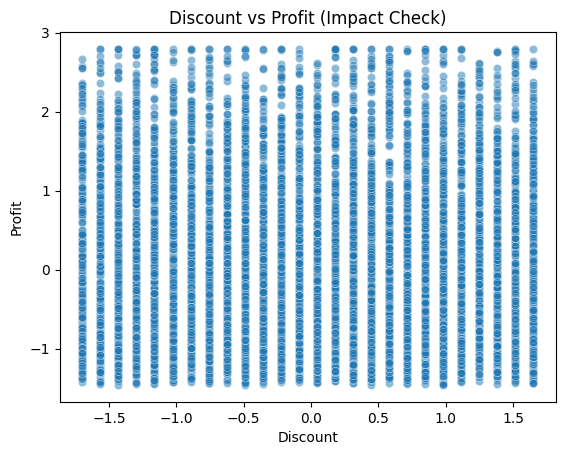

In [62]:
# Discount impact on profit
print("Correlation (Discount vs Profit):", df[["Discount","Profit"]].corr().iloc[0,1])
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.5)
plt.title("Discount vs Profit (Impact Check)")
plt.show()

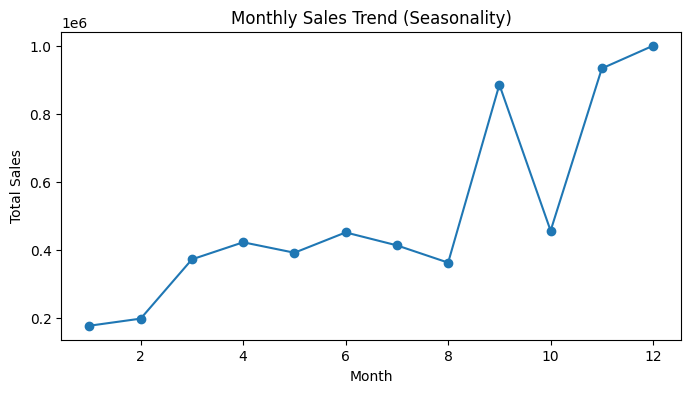

In [63]:
# Seasonality monthly sales trend
monthly_sales = df.groupby(df['Order Date'].dt.month)["Sales"].sum()
plt.figure(figsize=(8,4))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [65]:
print("📌 Conclusion & Insights")
print("- Best regression model achieved R² around:", round(r2_score(y_test, y_pred),3))
print("- Prophet forecast shows the expected sales trend for the next 30 days.")
print("- Top profitable categories:", cat_profit.head(3).to_dict())
print("- Top performing cities:", city_sales.head(3).to_dict())
print("- Correlation between Discount and Profit:", round(df[["Discount","Profit"]].corr().iloc[0,1],3))
print("👉 Future Work: Further hyperparameter tuning and feature engineering can improve model performance.")

📌 Conclusion & Insights
- Best regression model achieved R² around: 0.359
- Prophet forecast shows the expected sales trend for the next 30 days.
- Top profitable categories: {'Snacks': 568178.85, 'Eggs, Meat & Fish': 567357.22, 'Fruits & Veggies': 530400.38}
- Top performing cities: {'Kanyakumari': 706764, 'Vellore': 676550, 'Bodi': 667177}
- Correlation between Discount and Profit: 0.0
👉 Future Work: Further hyperparameter tuning and feature engineering can improve model performance.
